In [2]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
import shap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [3]:
# 1. Load the data
data = pd.read_csv("cox-violent-parsed.csv")

X = data[["age", "juv_fel_count", "juv_misd_count", "juv_other_count", "priors_count"]]
y = data["event"]
# data = data[data["race"] == "African-American"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [4]:
# # 3. Perform PCA for feature selection
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# # Perform PCA for feature selection
# pca = PCA(n_components=4)
# X_train = pca.fit_transform(X_train)
# X_test = pca.transform(X_test)

In [5]:
# 4. Implement Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)  # Assuming "decile_score" is the target variable

GaussianNB()

In [6]:
# 5. Generate predictions and analyze bias
y_pred = model.predict(X_test)

In [7]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9252183406113537


In [8]:
full_data =  pd.read_csv("cox-violent-parsed.csv")

full_data['prediction'] = 0
for i in range(len(full_data["decile_score"])):
    if full_data['decile_score'][i] > 4: full_data['prediction'][i] = 1


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [9]:
# print(full_data[['decile_score', 'prediction']])

In [10]:
# print("Accuracy:", accuracy_score(full_data['event'], full_data['prediction']))

Precision:  0.08088235294117647
Recall:  0.06875


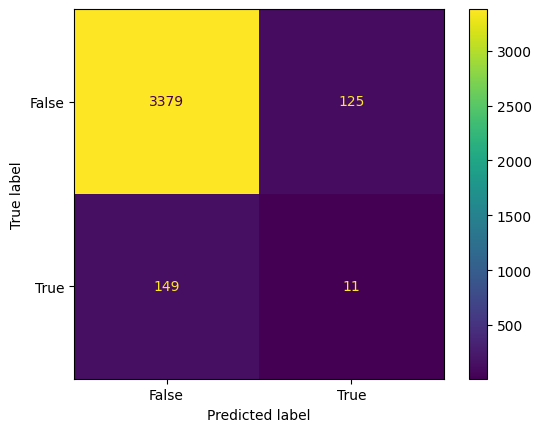

In [11]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

precision = precision_score(y_test, y_pred=y_pred)
recall = recall_score(y_test, y_pred=y_pred)
cm = confusion_matrix(y_test, y_pred)
print('Precision: ',precision)
print('Recall: ',recall)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

cm_display.plot()
plt.show()

In [12]:
import numpy as np
full_data = pd.read_csv("cox-violent-parsed.csv")
full_data = full_data[full_data["race"] == "African-American"]
full_data['prediction'] = np.where(full_data['decile_score'] > 4, 1, 0)


In [13]:
mask = (full_data['prediction'] == 1) & (full_data['event'] == 0) & (full_data['decile_score'] > 4)

# Apply the mask to the dataframe
filtered_data = full_data[mask]
print(filtered_data.size)
print(full_data.size)


319908
518923


In [14]:
# # Import matplotlib
# import matplotlib.pyplot as plt

# # Create a list of the dataframe sizes
# sizes = [filtered_data.size, full_data.size]

# # Create a list of labels for the dataframes
# labels = ['Filtered Data', 'Full Data']

# # Create a bar plot with the sizes and labels
# plt.bar(labels, sizes)

# # Add a title and axis labels
# plt.title('Comparison of Dataframe Sizes')
# plt.xlabel('Dataframe')
# plt.ylabel('Size')

# # Show the plot
# plt.show()


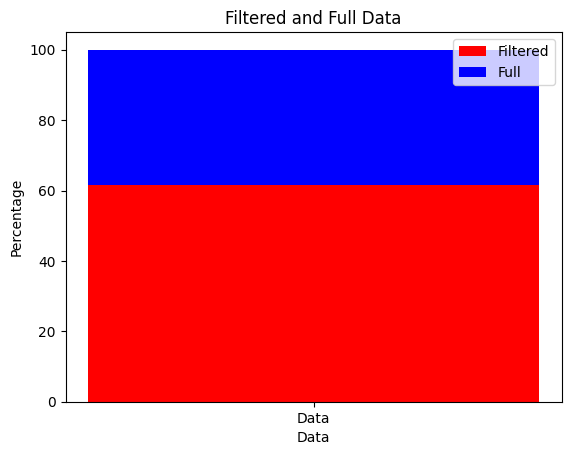

In [15]:
# Import matplotlib library
import matplotlib.pyplot as plt

# Create a figure and an axis
fig, ax = plt.subplots()

# Set the title and the labels
ax.set_title("Filtered and Full Data")
ax.set_xlabel("Data")
ax.set_ylabel("Percentage")

# Calculate the percentage of filtered data
percentage = filtered_data.size / full_data.size * 100

# Plot the filtered data in red and the full data in blue as a stacked bar with a reduced width
ax.bar("Data", percentage, color="red", label="Filtered", width=0.5)
ax.bar("Data", 100 - percentage, color="blue", bottom=percentage, label="Full", width=0.5)

# Add a legend
ax.legend()

# Show the graph
plt.show()



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

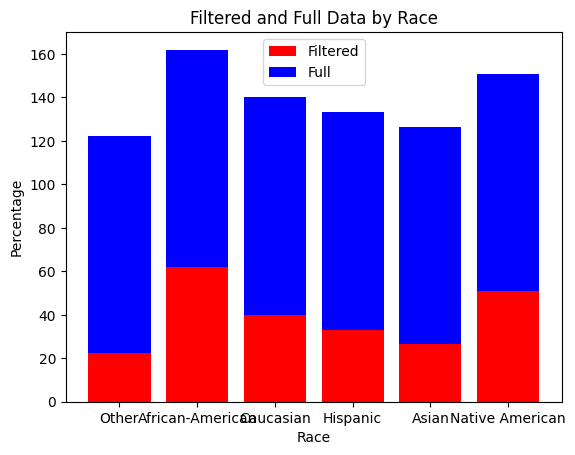

In [16]:
# Import pandas and matplotlib libraries
import pandas as pd
import matplotlib.pyplot as plt

# Read the csv file into a dataframe
df = pd.read_csv("cox-violent-parsed.csv")

# Filter out entries with no indication of recidivism or no compass score
df = df[df['is_recid'] != -1]
df = df[df['decile_score'] != -1]

# Rename recidivism column
df['recidivism_within_2_years'] = df['is_recid']

# Create a list of races
races = df['race'].unique()

# Create an empty list to store the percentages of filtered data for each race
percentages = []

# Loop through each race
for race in races:
  # Select the data for the current race
  full_data = df[df['race'] == race]

  # Generate the prediction column based on the decile score
  full_data['prediction'] = np.where(full_data['decile_score'] > 4, 1, 0)

  # Create a mask to filter out the false positives
  mask = (full_data['prediction'] == 1) & (full_data['event'] == 0) & (full_data['decile_score'] > 4)

  # Apply the mask to the dataframe
  filtered_data = full_data[mask]

  # Calculate the percentage of filtered data and append it to the list
  percentage = filtered_data.size / full_data.size * 100
  percentages.append(percentage)

# Create a figure and an axis
fig, ax = plt.subplots()

# Set the title and the labels
ax.set_title("Filtered and Full Data by Race")
ax.set_xlabel("Race")
ax.set_ylabel("Percentage")

# Plot the filtered data in red and the full data in blue as stacked bars
ax.bar(races, percentages, color="red", label="Filtered")
ax.bar(races, [100] * len(races), color="blue", bottom=percentages, label="Full")

# Add a legend
ax.legend()

# Show the graph
plt.show()



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

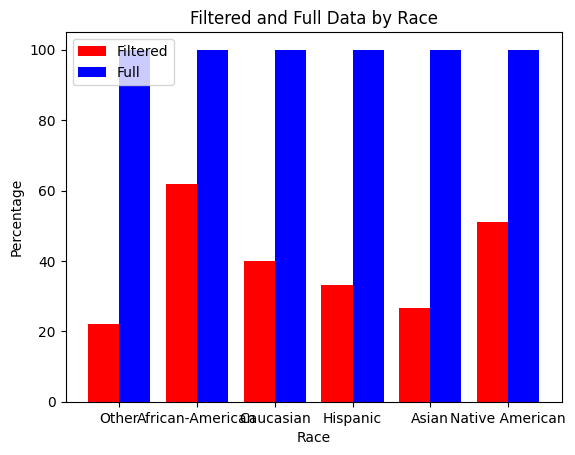

In [17]:
# Import pandas and matplotlib libraries
import pandas as pd
import matplotlib.pyplot as plt

# Read the csv file into a dataframe
df = pd.read_csv("cox-violent-parsed.csv")

# Filter out entries with no indication of recidivism or no compass score
df = df[df['is_recid'] != -1]
df = df[df['decile_score'] != -1]

# Rename recidivism column
df['recidivism_within_2_years'] = df['is_recid']

# Create a list of races
races = df['race'].unique()

# Create an empty list to store the percentages of filtered data for each race
percentages = []

# Loop through each race
for race in races:
  # Select the data for the current race
  full_data = df[df['race'] == race]

  # Generate the prediction column based on the decile score
  full_data['prediction'] = np.where(full_data['decile_score'] > 4, 1, 0)

  # Create a mask to filter out the false positives
  mask = (full_data['prediction'] == 1) & (full_data['event'] == 0) & (full_data['decile_score'] > 4)

  # Apply the mask to the dataframe
  filtered_data = full_data[mask]

  # Calculate the percentage of filtered data and append it to the list
  percentage = filtered_data.size / full_data.size * 100
  percentages.append(percentage)

# Create a figure and an axis
fig, ax = plt.subplots()

# Set the title and the labels
ax.set_title("Filtered and Full Data by Race")
ax.set_xlabel("Race")
ax.set_ylabel("Percentage")

# Create a list of x positions for each race
x_pos = range(len(races))

# Plot the filtered data in red and the full data in blue as adjacent bars
ax.bar(x_pos, percentages, color="red", label="Filtered", width=0.4)
ax.bar([x + 0.4 for x in x_pos], [100] * len(races), color="blue", label="Full", width=0.4)

# Set the x ticks and labels
ax.set_xticks([x + 0.2 for x in x_pos])
ax.set_xticklabels(races)

# Add a legend
ax.legend()
# Show the graph
plt.show()



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

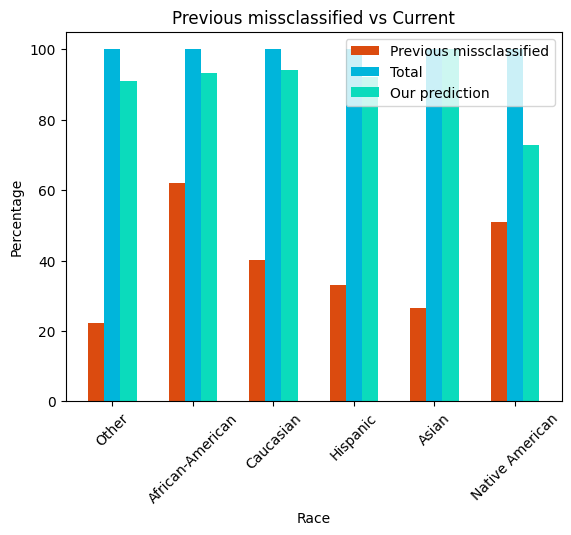

In [31]:
# Import pandas and matplotlib libraries
import pandas as pd
import matplotlib.pyplot as plt

# Read the csv file into a dataframe
df = pd.read_csv("cox-violent-parsed.csv")

# Filter out entries with no indication of recidivism or no compass score
df = df[df['is_recid'] != -1]
df = df[df['decile_score'] != -1]

# Rename recidivism column
df['recidivism_within_2_years'] = df['is_recid']

# Create a list of races
races = df['race'].unique()

# Create an empty list to store the percentages of filtered data for each race
percentages = []
percentages1 = []

# Loop through each race
for race in races:
    # Select the data for the current race
    full_data = df[df['race'] == race]
    
    # Generate the prediction column based on the decile score
    full_data['prediction'] = np.where(full_data['decile_score'] > 4, 1, 0)
    
    # Create a mask to filter out the false positives
    mask = (full_data['prediction'] == 1) & (full_data['event'] == 0) & (full_data['decile_score'] > 4)
    
    # Apply the mask to the dataframe
    filtered_data = full_data[mask]
    
    # Calculate the percentage of filtered data and append it to the list
    percentage = filtered_data.size / full_data.size * 100
    percentages.append(percentage)

    X = full_data[["age", "juv_fel_count", "juv_misd_count", "juv_other_count", "priors_count"]]
    y = full_data["event"]
    # data = data[data["race"] == "African-American"]
    full_data = full_data[((full_data["score_text"] == "high") | (full_data["score_text"] == "medium"))]
    # data = data[(data["decile_score"] == "low")]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    # Perform PCA for feature selection
    pca = PCA(n_components=4)
    X_train = pca.fit_transform(X_train)
    X_test = pca.transform(X_test)

    model = GaussianNB()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    percentage1 = accuracy_score(y_test, y_pred) * 100
    percentages1.append(percentage1)


# Create a figure and an axis
fig, ax = plt.subplots()

# Set the title and the labels
ax.set_title("Previous missclassified vs Current")
ax.set_xlabel("Race")
ax.set_ylabel("Percentage")

# Create a list of x positions for each race
x_pos = range(len(races))

# Plot the filtered data in red and the full data in blue as adjacent bars
ax.bar(x_pos, percentages, color="#DB4B0F", label="Previous missclassified", width=0.2)
ax.bar([x + 0.2 for x in x_pos], [100] * len(races), color="#00B5DB", label="Total", width=0.2)
ax.bar([x + 0.4 for x in x_pos], percentages1, color="#0BDBBC", label="Our prediction", width=0.2)

# Set the x ticks and labels
ax.set_xticks([x + 0.2 for x in x_pos])
ax.set_xticklabels(races, rotation=45)

# Add a legend
ax.legend()

# Show the graph
plt.show()

In [19]:
# Import the accuracy_score function
from sklearn.metrics import accuracy_score

# Calculate the total accuracy of the model
total_accuracy = accuracy_score(y_test, y_pred)

# Print the total accuracy
print("The total accuracy of the model is:", total_accuracy)


The total accuracy of the model is: 0.7272727272727273



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

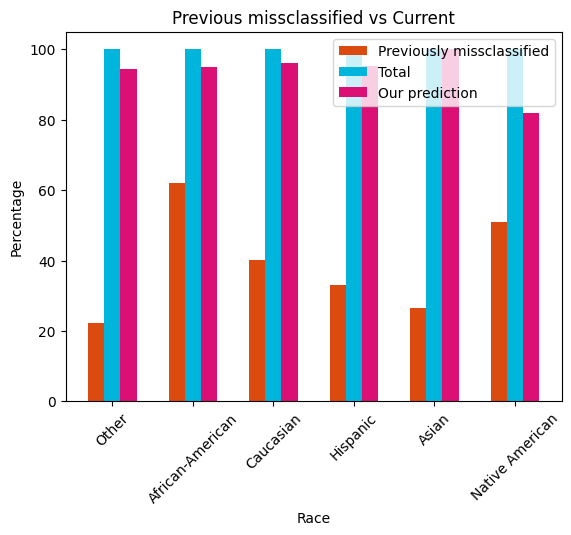

In [28]:
# Import pandas and matplotlib libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Read the csv file into a dataframe
df = pd.read_csv("cox-violent-parsed.csv")

# Filter out entries with no indication of recidivism or no compass score
df = df[df['is_recid'] != -1]
df = df[df['decile_score'] != -1]

# Rename recidivism column
df['recidivism_within_2_years'] = df['is_recid']

# Create a list of races
races = df['race'].unique()

# Create an empty list to store the percentages of filtered data for each race
percentages = []
percentages1 = []

# Loop through each race
for race in races:
    # Select the data for the current race
    full_data = df[df['race'] == race]
    
    # Generate the prediction column based on the decile score
    full_data['prediction'] = np.where(full_data['decile_score'] > 4, 1, 0)
    
    # Create a mask to filter out the false positives
    mask = (full_data['prediction'] == 1) & (full_data['event'] == 0) & (full_data['decile_score'] > 4)
    
    # Apply the mask to the dataframe
    filtered_data = full_data[mask]
    
    # Calculate the percentage of filtered data and append it to the list
    percentage = filtered_data.size / full_data.size * 100
    percentages.append(percentage)

    X = full_data[["age", "juv_fel_count", "juv_misd_count", "juv_other_count", "priors_count"]]
    y = full_data["event"]
    # data = data[data["race"] == "African-American"]
    full_data = full_data[((full_data["score_text"] == "high") | (full_data["score_text"] == "medium"))]
    # data = data[(data["decile_score"] == "low")]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    # Perform PCA for feature selection
    pca = PCA(n_components=4)
    X_train = pca.fit_transform(X_train)
    X_test = pca.transform(X_test)

    model = LogisticRegression(penalty="l2")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    percentage1 = accuracy_score(y_test, y_pred) * 100
    percentages1.append(percentage1)


# Create a figure and an axis
fig, ax = plt.subplots()

# Set the title and the labels
ax.set_title("Previous missclassified vs Current")
ax.set_xlabel("Race")
ax.set_ylabel("Percentage")

# Create a list of x positions for each race
x_pos = range(len(races))

# Plot the filtered data in red and the full data in blue as adjacent bars
ax.bar(x_pos, percentages, color="#DB4B0F", label="Previously missclassified", width=0.2)
ax.bar([x + 0.2 for x in x_pos], [100] * len(races), color="#00B5DB", label="Total", width=0.2)
ax.bar([x + 0.4 for x in x_pos], percentages1, color="#DB0F74", label="Our prediction", width=0.2)

# Set the x ticks and labels
ax.set_xticks([x + 0.2 for x in x_pos])
ax.set_xticklabels(races, rotation=45)

# Add a legend
ax.legend()

# Show the graph
plt.show()

In [21]:
# Import the accuracy_score function
from sklearn.metrics import accuracy_score

# Calculate the total accuracy of the model
total_accuracy = accuracy_score(y_test, y_pred)

# Print the total accuracy
print("The total accuracy of the model is:", total_accuracy)


The total accuracy of the model is: 0.8181818181818182



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

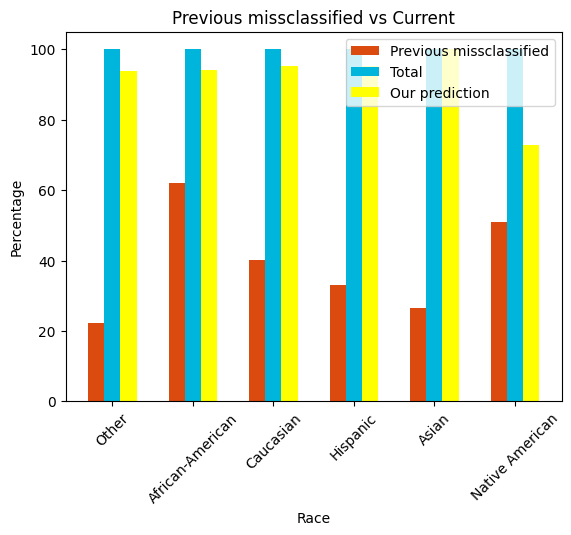

In [29]:
# Import pandas and matplotlib libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Read the csv file into a dataframe
df = pd.read_csv("cox-violent-parsed.csv")

# Filter out entries with no indication of recidivism or no compass score
df = df[df['is_recid'] != -1]
df = df[df['decile_score'] != -1]

# Rename recidivism column
df['recidivism_within_2_years'] = df['is_recid']

# Create a list of races
races = df['race'].unique()

# Create an empty list to store the percentages of filtered data for each race
percentages = []
percentages1 = []

# Loop through each race
for race in races:
    # Select the data for the current race
    full_data = df[df['race'] == race]
    
    # Generate the prediction column based on the decile score
    full_data['prediction'] = np.where(full_data['decile_score'] > 4, 1, 0)
    
    # Create a mask to filter out the false positives
    mask = (full_data['prediction'] == 1) & (full_data['event'] == 0) & (full_data['decile_score'] > 4)
    
    # Apply the mask to the dataframe
    filtered_data = full_data[mask]
    
    # Calculate the percentage of filtered data and append it to the list
    percentage = filtered_data.size / full_data.size * 100
    percentages.append(percentage)

    X = full_data[["age", "juv_fel_count", "juv_misd_count", "juv_other_count", "priors_count"]]
    y = full_data["event"]
    # data = data[data["race"] == "African-American"]
    full_data = full_data[((full_data["score_text"] == "high") | (full_data["score_text"] == "medium"))]
    # data = data[(data["decile_score"] == "low")]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    # Perform PCA for feature selection
    pca = PCA(n_components=4)
    X_train = pca.fit_transform(X_train)
    X_test = pca.transform(X_test)

    model = RandomForestClassifier(n_estimators=100)

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    percentage1 = accuracy_score(y_test, y_pred) * 100
    percentages1.append(percentage1)


# Create a figure and an axis
fig, ax = plt.subplots()

# Set the title and the labels
ax.set_title("Previous missclassified vs Current")
ax.set_xlabel("Race")
ax.set_ylabel("Percentage")

# Create a list of x positions for each race
x_pos = range(len(races))

# Plot the filtered data in red and the full data in blue as adjacent bars
ax.bar(x_pos, percentages, color="#DB4B0F", label="Previous missclassified", width=0.2)
ax.bar([x + 0.2 for x in x_pos], [100] * len(races), color="#00B5DB", label="Total", width=0.2)
ax.bar([x + 0.4 for x in x_pos], percentages1, color="yellow", label="Our prediction", width=0.2)

# Set the x ticks and labels
ax.set_xticks([x + 0.2 for x in x_pos])
ax.set_xticklabels(races, rotation=45)

# Add a legend
ax.legend()

# Show the graph
plt.show()

In [23]:
# Import the accuracy_score function
from sklearn.metrics import accuracy_score

# Calculate the total accuracy of the model
total_accuracy = accuracy_score(y_test, y_pred)

# Print the total accuracy
print("The total accuracy of the model is:", total_accuracy)


The total accuracy of the model is: 0.7272727272727273
